In [6]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.utils.np_utils import to_categorical

import os
import shutil 
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import numpy as np
import random
from sklearn.utils import shuffle
import datetime

In [7]:
#DATA SETTING: TEST
# RENAME the file in the Database: it will avoid any conflicts; 
#Every images will be called with the type of fruit followed by a progressive number

fruit = ["Apple", "Banana", "Plum", "Pepper", "Cherry", "Grape", "Tomato", "Potato", "Pear", "Peach"]

dir = 'C:\\Users\\Notebook\\Desktop\\ml project\\fruits-360\\Test'

i = 0
for file in os.listdir(dir):
    for var in fruit:
        p1 = os.path.join(dir, file)
       
        if(file.startswith(var) and not file.startswith("Grapefruit")):
            
            for img in os.listdir(p1):
                new = str(var) + " {}.jpg".format(i)
                new_name = os.path.join(p1, new)
                p2 = os.path.join(p1, img)
                os.rename(p2, new_name)
                i = i+1    
#Create a new directory for each fruit/veg and move in it all the variety of tha fruit/veg

for var in fruit:
    folder= os.path.join(dir, "new_" + var)
    os.mkdir(folder)
    
files = os.listdir(dir)

path = []
for f in files:
    for var in fruit:
        if (f.startswith(var) ):
            list = [f]
            path = path +list

link2= []
for types in path:
    link = os.path.join(dir, types)
    for img in os.listdir(link):
        link2 = [os.path.join(link, img)] + link2

            
for pic in link2:   
    for fr in fruit:
        if (fr in pic):
            folder_path = os.path.join(dir, "new_" + fr)
            shutil.copy(pic, folder_path)
            
#REMOVE TOMATO FROM CHERRY DIRECTORY
path_cherry = os.path.join(dir, "new_Cherry")
exclude = "Tomato"

for imgs in os.listdir(path_cherry):
    if (imgs.startswith(exclude)):
        exclude_path = os.path.join(path_cherry, imgs)
        os.remove(exclude_path)
        
#REMOVE GRAPFRUIT

path_grape= os.path.join(dir, "new_Grape")

for img in os.listdir(path_grape):
    if (not img.startswith("Grape")):
        exclude_path = os.path.join(path_grape, img)
        os.remove(exclude_path)

In [8]:
#Data: TRAINING SET
# RENAME the file in the Database: it will avoid any conflicts; 
#Every images will be called with the type of fruit followed by a progressive number

fruit = ["Apple", "Banana", "Plum", "Pepper", "Cherry", "Grape", "Tomato", "Potato", "Pear", "Peach"]

dir = 'C:\\Users\\Notebook\\Desktop\\ml project\\fruits-360\\Training'

i = 0
for file in os.listdir(dir):
    
    for var in fruit:
        p1 = os.path.join(dir, file)
       
        if(file.startswith(var) and not file.startswith("Grapefruit")):
            
            for img in os.listdir(p1):
                new = str(var) + " {}.jpg".format(i)
                new_name = os.path.join(p1, new)
                p2 = os.path.join(p1, img)
                os.rename(p2, new_name)
                i = i+1
                
for var in fruit:
    folder= os.path.join(dir, "new_" + var)
    os.mkdir(folder)
    
files = os.listdir(dir)

path = []
for f in files:
    for var in fruit:
        if (f.startswith(var) ):
            list = [f]
            path = path +list

link2= []
for types in path:
    link = os.path.join(dir, types)
    for img in os.listdir(link):
        link2 = [os.path.join(link, img)] + link2

            
for pic in link2:   
    for fr in fruit:
        if (fr in pic):
            folder_path = os.path.join(dir, "new_" + fr)
            shutil.copy(pic, folder_path)
            
#REMOVE TOMATO FROM CHERRY DIRECTORY
path_cherry = os.path.join(dir, "new_Cherry")
exclude = "Tomato"

for imgs in os.listdir(path_cherry):
    if (imgs.startswith(exclude)):
        exclude_path = os.path.join(path_cherry, imgs)
        os.remove(exclude_path)
        
#REMOVE GRAPFRUIT

path_grape= os.path.join(dir, "new_Grape")

for img in os.listdir(path_grape):
    if (not img.startswith("Grape")):
        exclude_path = os.path.join(path_grape, img)
        os.remove(exclude_path)

In [9]:
#Resize and conversion to 32*32 RGB
###TRAINING SET
dir_training = 'C:\\Users\\Notebook\\Desktop\\ml project\\fruits-360\\Training'

X_train =[]
y_train =[]

for file in os.listdir(dir_training):
    if(file.startswith("new")):
    
        path_training = os.path.join(dir_training, file)
        for img in os.listdir(path_training):
            img_path = os.path.join(path_training, img)
            img_array = cv2.imread(img_path)
            img_array = cv2.resize(img_array, (32,32))
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)         
            
            X_train.append(img_array)
            y_train.append(file[4:])

###TEST SET: resize and conversion
dir_test = 'C:\\Users\\Notebook\\Desktop\\ml project\\fruits-360\\Test'

X_test = []
y_test = []

for file in os.listdir(dir_test):
    if(file.startswith("new")):
    
        path1 = os.path.join(dir_test, file)
        for img in os.listdir(path1):
            img_path = os.path.join(path1, img)
            img_array = cv2.imread(img_path)
            img_array = cv2.resize(img_array, (32,32))
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            
            X_test.append(img_array)
            y_test.append(file[4:])

In [15]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [11]:
# Numerical labels
label_to_id={v:k for k, v in enumerate(np.unique(y_train))}

y_train_label_id = np.array([label_to_id[i] for i in y_train])
y_test_label_id = np.array([label_to_id[i] for i in y_test])

y_cat_train_label_id=to_categorical(y_train_label_id)
y_cat_test_label_id=to_categorical(y_test_label_id)

(array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]], dtype=float32),
 array(['Apple', 'Apple', 'Apple', ..., 'Tomato', 'Tomato', 'Tomato'],
       dtype='<U6'))

In [19]:
#Normalization data and shuffle
X_train = np.array([x / 255 for x in X_train])
X_test = np.array([x /255 for x in X_test])

X_train, y_cat_train_label_id = shuffle(X_train, y_cat_train_label_id)

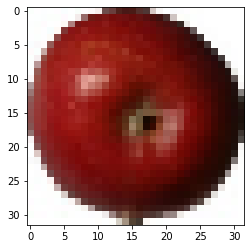

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [26]:
plt.imshow(X_train[10])
plt.show()
y_cat_train_label_id[10]

In [27]:
#DEFINE LENET MODEL

class LeNet(Sequential):
    def __init__(self, input_shape, nb_classes):
        super().__init__()

        self.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding="same"))
        self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
        self.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
        self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
        self.add(Flatten())
        self.add(Dense(120, activation='tanh'))
        self.add(Dense(84, activation='tanh'))
        self.add(Dense(nb_classes, activation='softmax'))

        self.compile(optimizer='adam',
                    loss= categorical_crossentropy,
                    metrics=['accuracy'])

In [28]:
num_classes = 10
input_shape = (32,32,3)
model = LeNet(input_shape, num_classes)
model.summary()

Model: "le_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 6)         456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               69240     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                10164

In [32]:
#Model Checkpoint
from keras.callbacks import ModelCheckpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
tf.keras.callbacks.TensorBoard(log_dir='./logs')
callbacks_list = [checkpoint]


In [33]:
results = model.fit(X_train, y=y_cat_train_label_id, 
          epochs=20, 
          validation_data=(X_test, y_cat_test_label_id), 
          callbacks= callbacks_list,
          verbose=1)

Train on 32607 samples, validate on 10906 samples
Epoch 1/20
32544/32607 [============================>.] - ETA: 0s - loss: 0.3551 - accuracy: 0.8932
Epoch 00001: val_accuracy improved from -inf to 0.94994, saving model to weights-improvement-01-0.95.hdf5
32607/32607 [==============================] - 100s 3ms/sample - loss: 0.3544 - accuracy: 0.8934 - val_loss: 0.1549 - val_accuracy: 0.9499
Epoch 2/20
32576/32607 [============================>.] - ETA: 0s - loss: 0.0174 - accuracy: 0.9970
Epoch 00002: val_accuracy improved from 0.94994 to 0.97020, saving model to weights-improvement-02-0.97.hdf5
32607/32607 [==============================] - 136s 4ms/sample - loss: 0.0174 - accuracy: 0.9970 - val_loss: 0.1007 - val_accuracy: 0.9702
Epoch 3/20
32576/32607 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 00003: val_accuracy improved from 0.97020 to 0.97552, saving model to weights-improvement-03-0.98.hdf5
32607/32607 [==============================] - 3

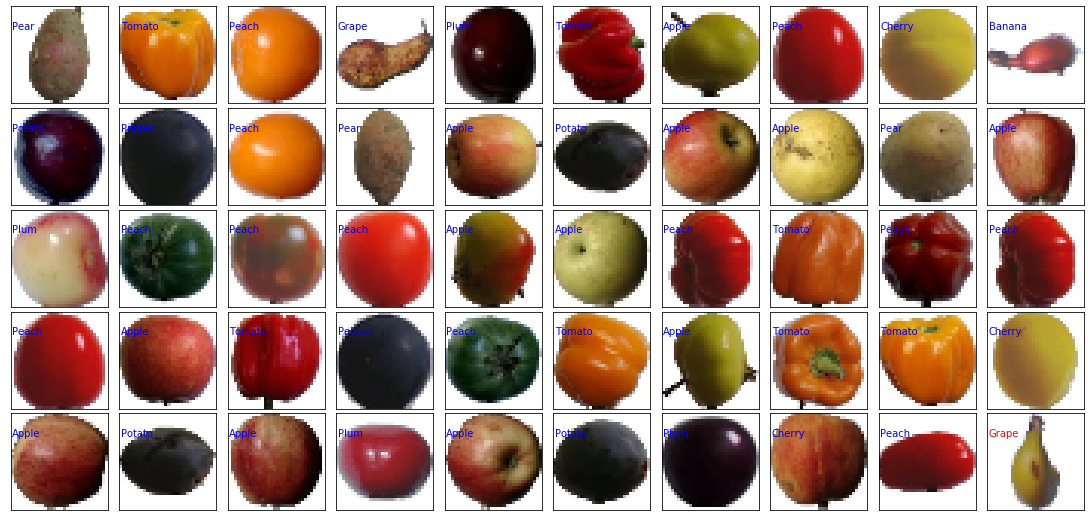

In [52]:
fruit = ["Apple", "Banana", "Plum", "Pepper", "Cherry", "Grape", "Tomato", "Potato", "Pear", "Peach"]

X_test, y_cat_test_label_id = shuffle(X_test, y_cat_test_label_id)

prediction_values = model.predict_classes(X_test)

# set up the figure
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the images: each image is 32x32 pixels
for i in range(50):
    ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i],cmap=plt.cm.gray_r, interpolation='nearest')
  
    if prediction_values[i] == np.argmax(y_cat_test_label_id[i]):
        # label the image with the blue text
        ax.text(0, 7, fruit[prediction_values[i]], color='blue')
    else:
        # label the image with the red text
        ax.text(0, 7, fruit[prediction_values[i]], color='red')